1. Consider a Cox-Ross-Rubinstein binomial tree model with the expected value of relative stock return $(S(t) - S(t-1))/S(t-1)$ equal to $0.02$, and variance equal to $0.0216$. Suppose the up factor is $u = 1.2$

    Compute the value of the down factor $d$

    We got that
    $E\left[\frac{S(t) - S(t-1)}{S(t-1)}\right] = 0.02$, $Var\left[\frac{S(t) - S(t-1)}{S(t-1)}\right] = 0.0216$ and $p_u = \frac{e^{r\Delta t} - d}{u - d}$

    Under the model of CRR we know that the distribution underlying random variable corresponds to a bernulli distribution so:
    $$
    E\left[\frac{S(t) - S(t-1)}{S(t-1)}\right] = p (u-1) + (1-p)(d-1)
    $$

    for any random variable 
    $$
        Var(X) = E[X^2] - E[X]^2
    $$

    therefor is easy to show that
    $$
        E\left[\left(\frac{S(t) - S(t-1)}{S(t-1)}\right)^2\right] = p (u-1)^2 + (1-p)(d-1)^2
    $$



in that way:

\begin{aligned}
    \text{Var}(X) &= E[X^2] - E[X]^2 \\
    &= p (u-1)^2 + (1-p)(d-1)^2 - \left( p (u-1) + (1-p)(d-1) \right)^2 \\
    &= p (u-1)^2 + (1-p)(d-1)^2 - \left( p^2 (u-1)^2 + 2p(u-1)(1-p)(d-1) + (1-p)^2(d-1)^2\right) \\
    &= p(u-1)^2 (1-p) + (1-p)(d-1)^2(1-(1-p)) - 2p(u-1)(1-p)(d-1) \\
    &= p(u-1)^2 (1-p) + p(1-p)(d-1)^2 - 2p(u-1)(1-p)(d-1) \\
    &= p(1-p) \left[(u-1)^2 -2(u-1)(d-1) +(d-1)^2\right] \\
    &= p(1-p) ((u-1) - (d-1))^2 \\
    &= p(1-p)(u-d)^2 
\end{aligned}

and 

\begin{aligned}
    E[X] &= p (u-1) + (1-p)(d-1) \\
    &= pu - p + d - 1 - pd + p \\
    &= p(u-d) +d-1   
\end{aligned}

Now we got an equation system to solve, and we are going to solve it with sympy


In [2]:
import sympy as sp 

d = sp.Symbol('d', real = True, positive = True)
u = 1.2

expected_return = 0.02
variance = 0.0216

p = (expected_return + 1 - d) / (u - d)

variance_expr = p * u**2 + (1-p) * d**2 - (expected_return + 1)**2

solution = sp.solve(variance_expr - variance, d)

solution



[0.900000000000000]

In [18]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

In [19]:
aapl_df = yf.download( 'AAPL',
                      start = '2020-01-01',
                      end = '2025-01-01'
    
)

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

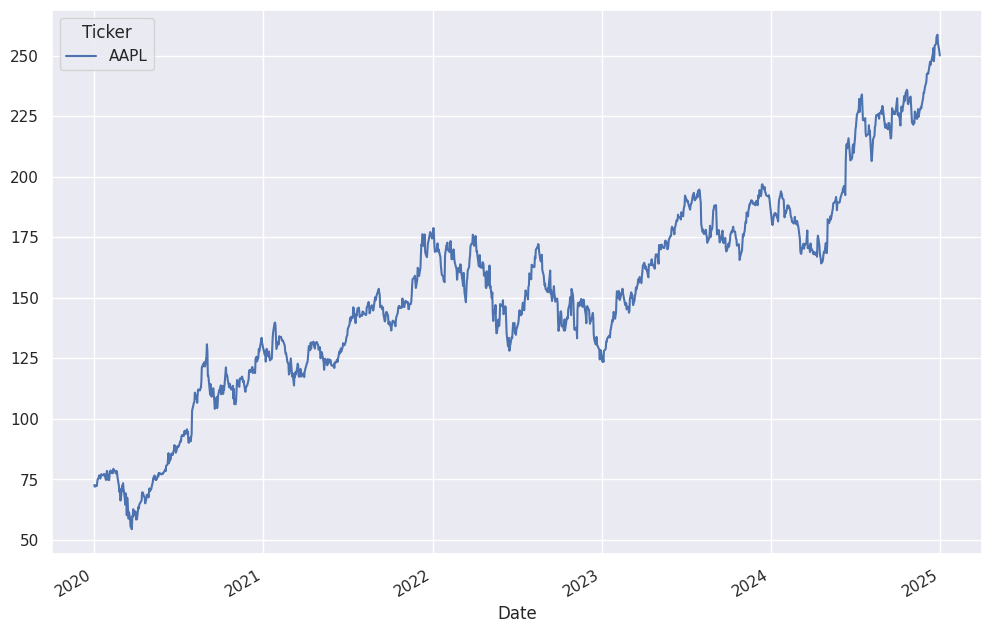

In [20]:
aapl_df['Close'].plot(kind = 'line', figsize = (12,8))

In [43]:
new_aapl = aapl_df['Close'].reset_index()
new_aapl['log_returns'] = np.log(new_aapl['AAPL'] / new_aapl['AAPL'].shift(1))
new_aapl.dropna(inplace= True)
new_aapl.set_index('Date', inplace = True)

<Axes: xlabel='Date'>

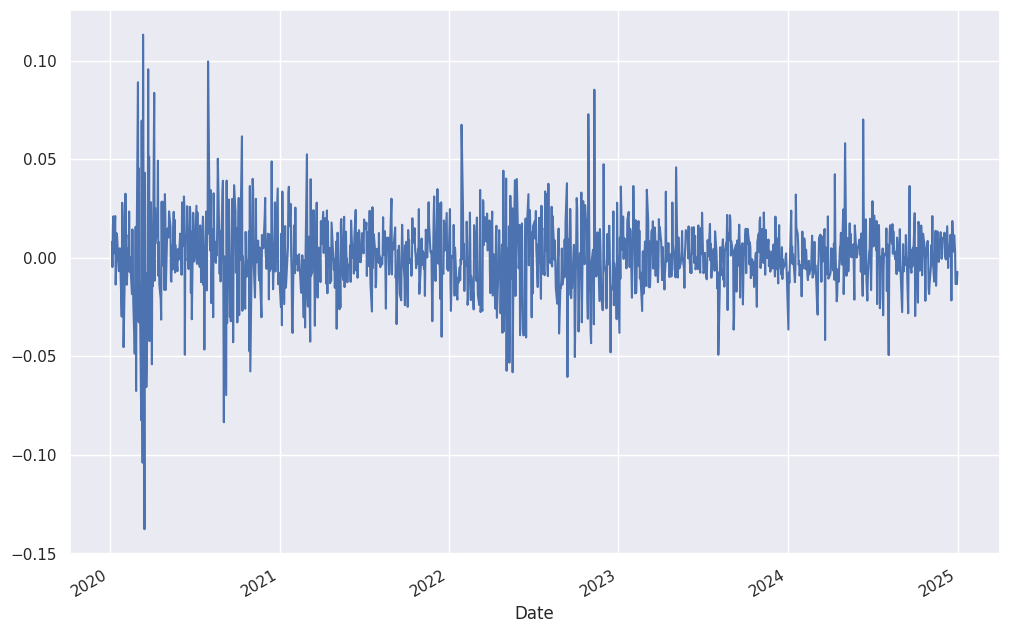

In [45]:
new_aapl['log_returns'].plot(kind = 'line', figsize=(12,8))

<Axes: ylabel='Frequency'>

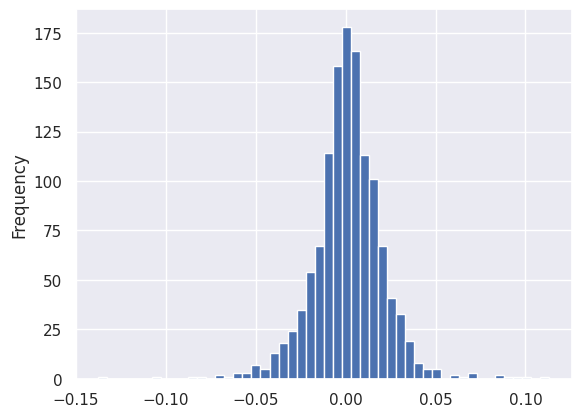

In [48]:
new_aapl['log_returns'].plot(kind = 'hist', bins = 50)